# Hyperparameter tuning

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
from sklearn import tree
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image

    import os
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path
    
    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names = columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [33]:
hr_url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
hr = pd.read_csv(hr_url)
hr_dummies = pd.get_dummies(hr)

error_rates = []
for i in np.random.randint(1,30, 100):
    train, test = train_test_split(hr_dummies, test_size = 0.3, random_state = i)

    train_y = train['Attrition']
    test_y = test['Attrition']
    train_x = train.drop('Attrition', axis = 1)
    test_x = test.drop('Attrition', axis = 1)

    model = DecisionTreeClassifier(max_depth=3)
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    error_rate = (test_pred != test_y).sum() / test_y.shape[0] * 100
    error_rates.append(error_rate)
    #error_rate

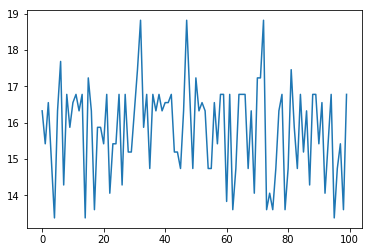

In [34]:
import matplotlib.pyplot as plt

plt.plot(error_rates)

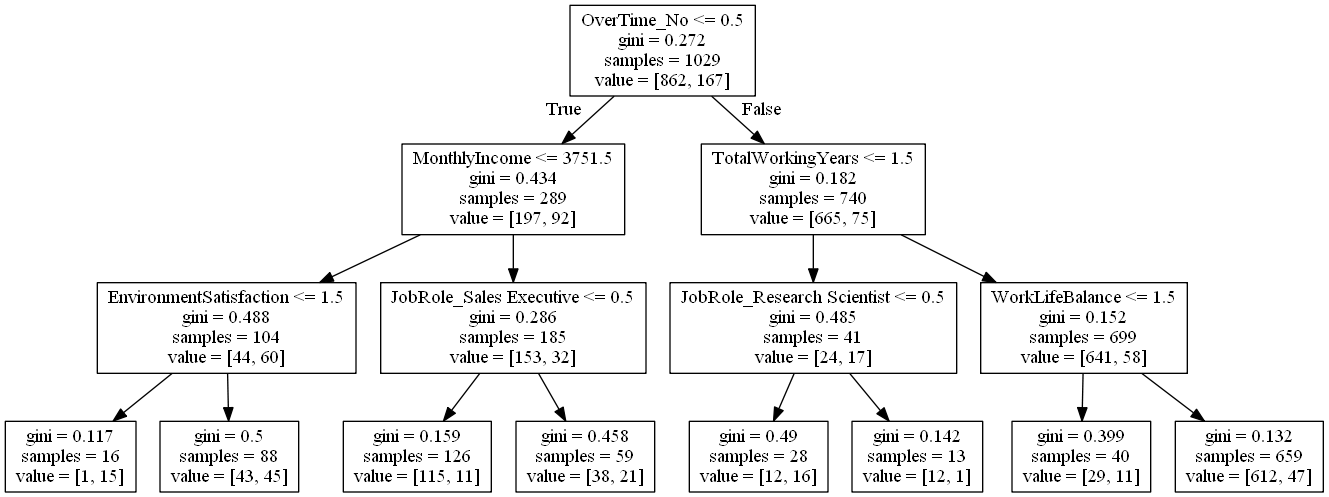

In [26]:
draw_tree(model, train_x.columns)

# Training vs Testing Error

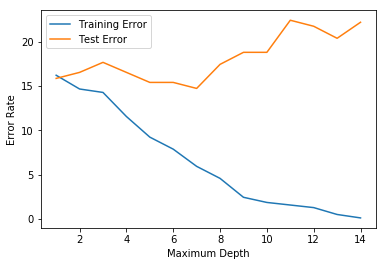

In [55]:

train, test = train_test_split(hr_dummies, test_size = 0.3, random_state = 100)
train_y = train['Attrition']
test_y = test['Attrition']
train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

train_errors = []
test_errors = []
depth = []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(train_x,train_y)
    
    train_pred = model.predict(train_x)
    train_error = (train_pred != train_y).sum() / train_y.shape[0] * 100
    
    test_pred = model.predict(test_x)
    test_error = (test_pred != test_y).sum() / test_y.shape[0] * 100
    
    depth.append(i)
    train_errors.append(train_error)
    test_errors.append(test_error)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(depth, train_errors)
plt.plot(depth, test_errors)
plt.xlabel('Maximum Depth')
plt.ylabel('Error Rate')
plt.legend(['Training Error', 'Test Error'])

## Hyper Parametric tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [71]:
dt_model = DecisionTreeClassifier()

params = {'max_depth': list(range(1,6)),
         'criterion': ['gini','entropy'],
         'min_samples_split': [10,15,204,5,6,7]}

tree_cv = GridSearchCV(dt_model, param_grid=params)
tree_cv.fit(train_x,train_y)
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}